**Web scrapping of Day-ahead electricity auctions prices in France, Germany and Denmark on Nord Pool**

Paco GORIEU--PETIT-PAS 80761

The data collection for price will be done via API call on Nord Pool website.

The webpage for Nord Pool auction prices relies on JavaScript to dynamically load content after the initial HTML is served, I am hence able to fetch data via API call.

In [45]:
import requests

api_url = 'https://dataportal-api.nordpoolgroup.com/api/AggregatePrices?year=2024&market=DayAhead&deliveryArea=FR,GER,DK1,DK2&currency=EUR'
params = {
    'year':'2024',
    'market':'DayAhead',
    'deliveryArea':'FR,GER,DK1,DK2',
    'currency':'EUR'
}

response = requests.get(api_url,params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

{'updatedAt': '2024-11-17T12:06:01.835913Z', 'year': 2024, 'market': 'DayAhead', 'deliveryAreas': ['FR', 'GER', 'DK1', 'DK2'], 'multiAreaDailyAggregates': [{'deliveryStart': '2024-11-18', 'deliveryEnd': '2024-11-18', 'averagePerArea': {'FR': 113.88, 'GER': 104.59, 'DK1': 91.12, 'DK2': 86.53}, 'maxPerArea': {'FR': 168.2, 'GER': 161.82, 'DK1': 161.82, 'DK2': 161.83}, 'minPerArea': {'FR': 61.78, 'GER': 42.39, 'DK1': 35.97, 'DK2': 13.08}}, {'deliveryStart': '2024-11-17', 'deliveryEnd': '2024-11-17', 'averagePerArea': {'FR': 90, 'GER': 63.48, 'DK1': 27.82, 'DK2': 28.81}, 'maxPerArea': {'FR': 135.43, 'GER': 102.84, 'DK1': 39.34, 'DK2': 39.34}, 'minPerArea': {'FR': 50.05, 'GER': 34.81, 'DK1': 14.85, 'DK2': 14.92}}, {'deliveryStart': '2024-11-16', 'deliveryEnd': '2024-11-16', 'averagePerArea': {'FR': 107.16, 'GER': 94.36, 'DK1': 23.75, 'DK2': 22.57}, 'maxPerArea': {'FR': 134, 'GER': 118.93, 'DK1': 47.03, 'DK2': 47.01}, 'minPerArea': {'FR': 91.98, 'GER': 65.67, 'DK1': 4.74, 'DK2': 3.28}}, {'del

In [47]:
#we extract the data that we need only and put it into a DataFrame
import pandas as pd

aggregates = data['multiAreaDailyAggregates']

rows = []
for agg in aggregates:
    date = agg['deliveryStart']
    averages = agg['averagePerArea']
    row = {'Date': date}
    row.update(averages)
    rows.append(row)

df = pd.DataFrame(rows)
print(df)

           Date      FR     GER     DK1     DK2
0    2024-11-18  113.88  104.59   91.12   86.53
1    2024-11-17   90.00   63.48   27.82   28.81
2    2024-11-16  107.16   94.36   23.75   22.57
3    2024-11-15  124.21  124.17   90.62   88.84
4    2024-11-14  125.10  122.02  106.27  106.28
..          ...     ...     ...     ...     ...
318  2024-01-05   90.54   91.37   91.37  193.91
319  2024-01-04   78.98   85.41   85.41   88.51
320  2024-01-03   46.11   45.22   45.97   53.72
321  2024-01-02   36.19   53.07   53.59   57.85
322  2024-01-01   13.14   16.18   32.94   38.74

[323 rows x 5 columns]


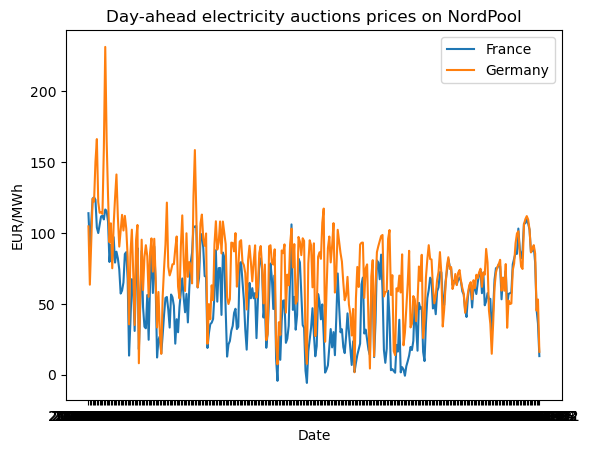

In [49]:
#we create a plot for France and Germany
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['FR'], label='France')
plt.plot(df['Date'], df['GER'], label='Germany')
plt.title('Day-ahead electricity auctions prices on NordPool')
plt.ylabel('EUR/MWh')
plt.xlabel('Date')
plt.legend()